<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist

In [39]:
#
# Load data
#
# MNIST dataset. 28x28 pixel grayscale images. Pixel values are 0 to 255. 
# 0 means background (white), 255 means foreground (black).
#
 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)
Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


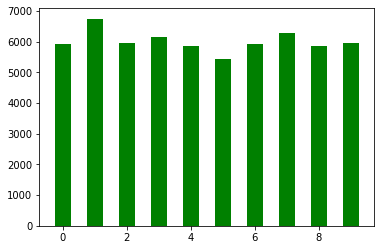

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


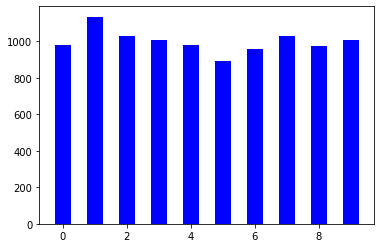

In [40]:
#
# (Optional here but essential in practice)
# Exploratory Analysis (very basic)
#

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

# Number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
train_labels = dict(zip(unique, counts))
print(f'Train labels: {train_labels}')
plt.bar(train_labels.keys(), train_labels.values(), width=.5, color='g')
plt.show()

# Number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
test_labels = dict(zip(unique, counts))
print(f'Test labels: {test_labels}')
plt.bar(test_labels.keys(), test_labels.values(), width=.5, color='b')
plt.show()

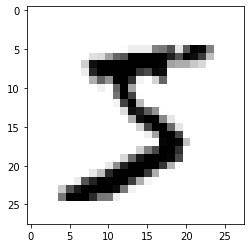

5


In [41]:
#
# (Optional) 
# Display the first image from a training set
#

# cmap can also be specified as string ("gray")
# Another option is to use plt.cm.gray
plt.imshow(x_train[0], cmap=plt.cm.binary) 
plt.show()

# Print the matching label
print(y_train[0])

In [42]:
#
# (Optional) 
# Verify pixel values in the original image
#

# Pixel values between 0 and 255
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

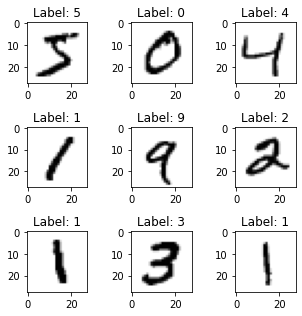

In [43]:
#
# (Optional)
# Display multiple images from the dataset in order to get a better overview
# of data
#

NUMBER_OF_EXAMPLES = 9
NUMBER_OF_ROWS = 3
NUMBER_OF_COLUMNS = 3

fig, axes = plt.subplots(
    NUMBER_OF_ROWS, NUMBER_OF_COLUMNS, 
    figsize=(1.5*NUMBER_OF_COLUMNS, 1.5*NUMBER_OF_ROWS)
)

for i in range(NUMBER_OF_EXAMPLES):
    ax = axes[i//NUMBER_OF_COLUMNS, i%NUMBER_OF_COLUMNS]
    ax.imshow(x_train[i], cmap=plt.cm.binary)
    ax.set_title(f'Label: {y_train[i]}')

plt.tight_layout()
plt.show()

In [44]:
#
# Normalization
#

# By default a L2(Euclidean) Vector Norm is used.
x_train = tf.keras.utils.normalize(x_train, axis=1) 

# Don't forget to normalize test data (and any further unseen data that feeds 
# into NN)!
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [45]:
#
# (Optional) 
# Check pixel values after the normalization
#

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

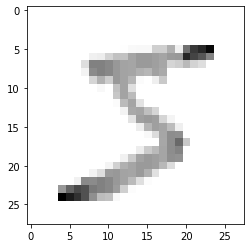

In [46]:
#
# (Optional) 
# Show the image again, after normalization
#
plt.imshow(x_train[0], cmap=plt.cm.binary) 
plt.show()

In [47]:
#
# Build the neural network
#

# We will use fully connected model
model = tf.keras.models.Sequential([
  # Input layer: Flatten layer, which flattens the input so that it can be fed 
  # into the model
  # 28x28 image gets flattened into 1x784
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  # Hidden layer(s)
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  # tf.keras.layers.Dense(128, activation=tf.nn.relu),
  # Output layer: returns an array of probability scores that sum to 1. 
  # Each node contains a score that indicates the probability that the current 
  # image belongs to one of the handwritten digit classes.
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [48]:
#
# (Optional)
# Print model summary
#

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
#
# Compile the model
#

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
#
# Training
#

BATCH_SIZE = 64
EPOCHS = 5

model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3670 - accuracy: 0.9013
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1705 - accuracy: 0.9500
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1207 - accuracy: 0.9646
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0922 - accuracy: 0.9728
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0737 - accuracy: 0.9782


In [51]:
#
# Evaluate the model performance
#

test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.0967 - accuracy: 0.9713
Test accuracy: 0.9713000059127808


In [52]:
#
# Make prediction on unseen data
#

# Make sure unseen data has undergone the same pre-processing
# (e.g. normalization) as the training data
predictions = model.predict(x_test)
predictions.shape

(10000, 10)

In [53]:
#
# Pick and print a prediction for one specific data point
#

print(np.argmax(predictions[1000]))

9


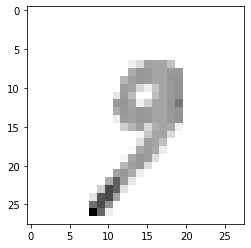

In [54]:
#
# Verify that prediction matches the data
#

plt.imshow(x_test[1000], cmap=plt.cm.binary)
plt.show()

In [55]:
predictions[1000]


array([1.51540547e-07, 1.43517327e-05, 2.60061093e-08, 1.29248658e-02,
       1.40884673e-04, 1.59455783e-06, 1.11262444e-10, 1.97308511e-03,
       6.20442847e-07, 9.84944403e-01], dtype=float32)

In [57]:
#
# (Optional)
# Let's verify that softmax output sum is indeed 1
#
predictions[1000].sum()

1.0